In [1]:
#비지도 학습?
#이미지>숫자 데이터인 npy 파일을 불러오자!

In [2]:
import numpy as np
fruits = np.load('data/fruits_300.npy')

In [4]:
fruits.shape #300개 샘플(사과100,바나나100,파인애플100)의 행렬이 100*100 이라는 뜻?

(300, 100, 100)

In [6]:
fruits[0][0] #사과1을 불러왓! 고양이 이미지 졸귀 1(검정)~256(흰색)까지 흑백 표현

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

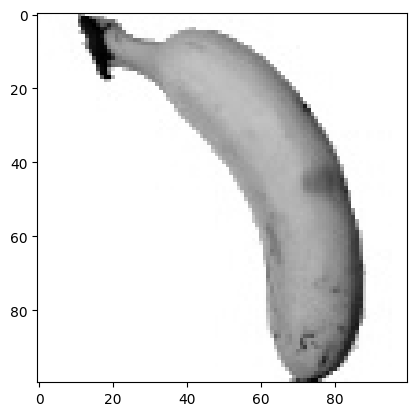

In [13]:
import matplotlib.pyplot as plt

plt.imshow(fruits[220], cmap = 'gray_r') #히익

In [14]:
apple = fruits[0:100].reshape(-1, 100*100) #이게 먼지 모르겠어~ [1x10000배열]
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [18]:
apple.mean(axis=1) #요소 = 사과1개의 평균, axis=1 안넣은 값은 뭐의 평균인가? 전체 평균

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

(array([21., 21., 27., 11.,  9.,  4.,  5.,  0.,  1.,  1.]),
 array([18.568  , 24.79665, 31.0253 , 37.25395, 43.4826 , 49.71125,
        55.9399 , 62.16855, 68.3972 , 74.62585, 80.8545 ]),
 <BarContainer object of 10 artists>)

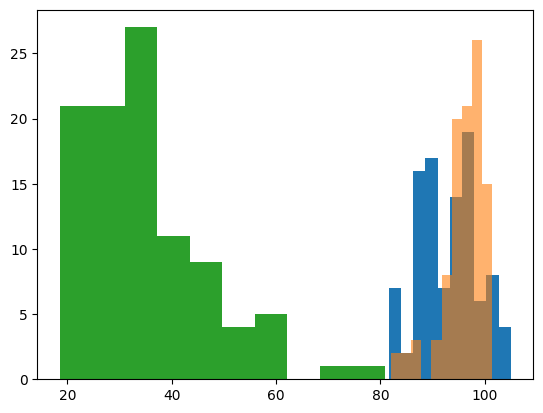

In [27]:
plt.hist(apple.mean(axis=1))
plt.hist(pineapple.mean(axis=1), alpha=0.6)
plt.hist(banana.mean(axis=1))

<BarContainer object of 10000 artists>

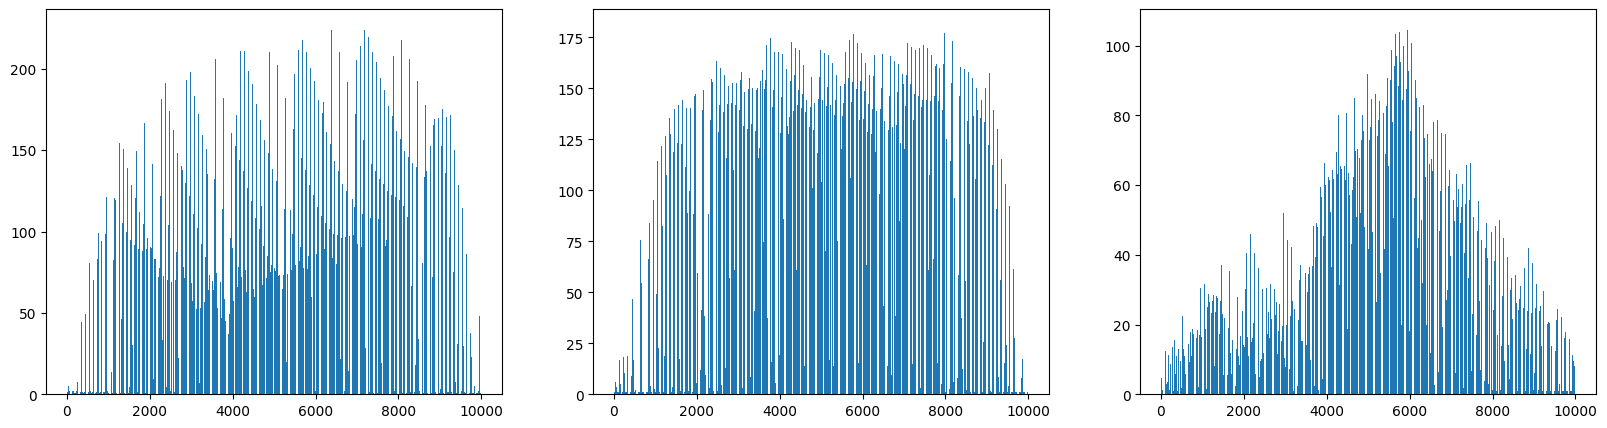

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5)) #빈 도화지를 여러개 도츨
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))

In [38]:
apple_mean = apple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)

apple_mean.shape #사진 1장의 역할. 아까껀 뭐였지 1x10000...

(100, 100)

# 클러스터링

In [51]:
fruits.shape #원본데이터
abs_diff = np.abs(fruits - banana_mean) #절댓값처리
abs_mean = abs_diff.mean(axis=(1,2)) #절댓값의 평균이다.
abs_mean[0] #abs_mean.shape #abs_mean

np.float64(61.372199)

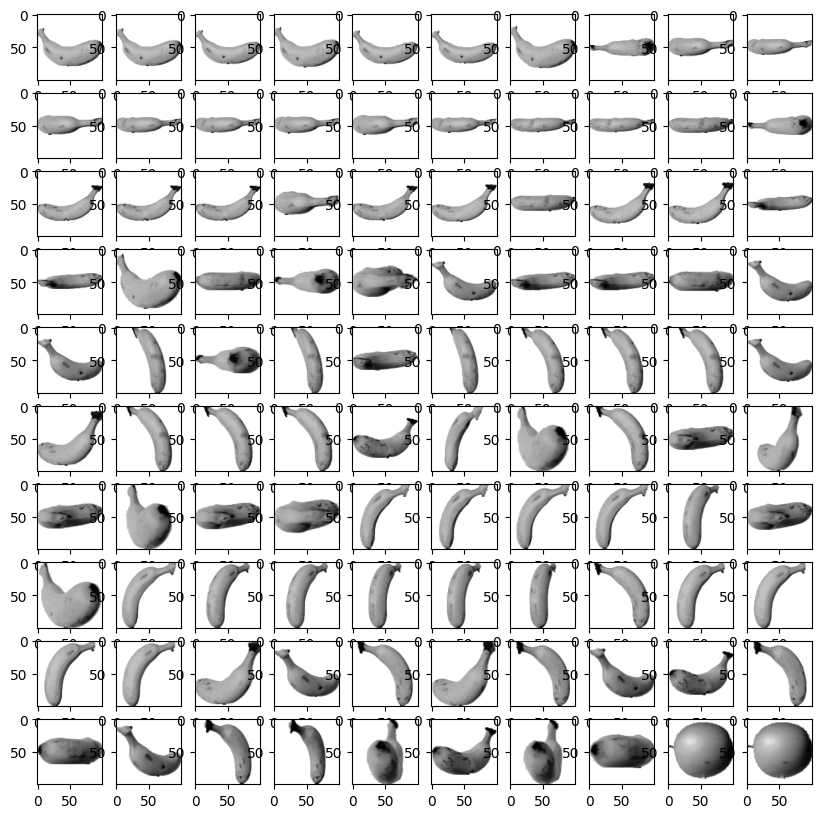

In [52]:
banana_index = np.argsort(abs_mean)[:100] #오름차순 정렬

fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap = 'gray_r')

In [49]:
for i in range(10):
    for j in range(10):
        print(i, j)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
